News Stance Detection

import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#self defined function from .py files
import clean as cl
import tfidf as ti
import feature as fe
import language_model as lm
import model as md

load data

In [3]:
train_bodies = pd.read_csv('./fnc-1/train_bodies.csv')
train_stances = pd.read_csv('./fnc-1/train_stances.csv')
test_bodies = pd.read_csv('./fnc-1/competition_test_bodies.csv')
test_stances = pd.read_csv('./fnc-1/competition_test_stances.csv')

In [4]:
train_bodies.head()

Body ID                                        articleBody
0        0  A small meteorite crashed into a wooded area i...
1        4  Last week we hinted at what was to come as Ebo...
2        5  (NEWSER) – Wonder how long a Quarter Pounder w...
3        6  Posting photos of a gun-toting child online, I...
4        7  At least 25 suspected Boko Haram insurgents we...

In [5]:
train_bodies.shape

(1683, 2)

In [6]:
train_stances.head()

Headline  Body ID     Stance
0  Police find mass graves with at least '15 bodi...      712  unrelated
1  Hundreds of Palestinians flee floods in Gaza a...      158      agree
2  Christian Bale passes on role of Steve Jobs, a...      137  unrelated
3  HBO and Apple in Talks for $15/Month Apple TV ...     1034  unrelated
4  Spider burrowed through tourist's stomach and ...     1923   disagree

In [7]:
train_stances.shape

(49972, 3)

In [8]:
test_bodies.shape

(904, 2)

In [9]:
test_stances.shape

(25413, 3)

clean data

In [10]:
clean_stances = train_stances.copy()
clean_bodies = train_bodies.copy()

In [11]:
clean_headline = [cl.clean_sentence(sentence) for sentence in clean_stances['Headline']]   
clean_article = [cl.clean_sentence(sentence) for sentence in clean_bodies['articleBody']]  

In [12]:
clean_stances['Headline'] = clean_headline
clean_bodies['articleBody'] = clean_article

In [13]:
#test set
clean_test_stances = test_stances.copy()
clean_test_bodies = test_bodies.copy()

In [14]:
clean_test_headline = [cl.clean_sentence(sentence) for sentence in clean_test_stances['Headline']]   
clean_test_article = [cl.clean_sentence(sentence) for sentence in clean_test_bodies['articleBody']]  

In [15]:
clean_test_stances['Headline'] = clean_test_headline
clean_test_bodies['articleBody'] = clean_test_article

In [16]:
clean_stances.head()

Headline  Body ID     Stance
0  [police, find, mass, graf, least, body, near, ...      712  unrelated
1  [hundreds, palestinians, flee, flood, gaza, is...      158      agree
2  [christian, bale, pass, role, steve, jobs, act...      137  unrelated
3  [hbo, apple, talks, month, apple, tv, streamin...     1034  unrelated
4          [spider, burrow, tourist, stomach, chest]     1923   disagree

In [17]:
clean_stances.shape

(49972, 3)

In [18]:
clean_bodies.head()

Body ID                                        articleBody
0        0  [small, meteorite, crash, wooded, area, nicara...
1        4  [last, week, hint, come, ebola, fear, spread, ...
2        5  [newser, wonder, long, quarter, pounder, chees...
3        6  [posting, photo, gun, tot, child, online, isis...
4        7  [least, suspected, boko, haram, insurgent, kil...

In [19]:
clean_bodies.shape

(1683, 2)

In [20]:
clean_test_stances.head()

Headline  Body ID     Stance
0  [ferguson, riot, pregnant, woman, lose, eye, c...     2008  unrelated
1  [crazy, conservatives, sure, gitmo, detainee, ...     1550  unrelated
2  [russian, guy, says, justin, bieber, ringtone,...        2  unrelated
3  [zombie, cat, buried, kitty, believed, dead, m...     1793  unrelated
4  [argentina, president, adopts, boy, end, werew...       37  unrelated

In [21]:
clean_test_bodies.head()

Body ID                                        articleBody
0        1  [al, sisi, deny, israeli, report, state, offer...
1        2  [bereave, afghan, mother, take, revenge, talib...
2        3  [cnbc, report, tesla, choose, nevada, site, gi...
3       12  [inch, version, iphone, say, development, repl...
4       19  [gr, editor, note, report, western, mainstream...

observe unique headlines and bodies

In [22]:
uni_head = train_stances['Headline'].unique()

In [23]:
uni_body = train_bodies['articleBody'].unique()

In [24]:
clean_uni_head = [cl.clean_sentence(sentence) for sentence in uni_head]   
clean_uni_body = [cl.clean_sentence(sentence) for sentence in uni_body]  

In [25]:
len(clean_uni_body)

1669

In [26]:
len(clean_uni_head)

1648

In [27]:
clean_uni_all = clean_uni_head + clean_uni_body

In [28]:
len(clean_uni_all)

3317

merge body and stance

In [29]:
clean_merge = pd.merge(clean_stances, clean_bodies, how='left', on=['Body ID', 'Body ID'])

In [30]:
clean_merge.head()

Headline  Body ID     Stance  \
0  [police, find, mass, graf, least, body, near, ...      712  unrelated   
1  [hundreds, palestinians, flee, flood, gaza, is...      158      agree   
2  [christian, bale, pass, role, steve, jobs, act...      137  unrelated   
3  [hbo, apple, talks, month, apple, tv, streamin...     1034  unrelated   
4          [spider, burrow, tourist, stomach, chest]     1923   disagree   

                                         articleBody  
0  [danny, boyle, direct, untitled, film, seth, r...  
1  [hundreds, palestinians, evacuate, home, sunda...  
2  [year, old, moscow, resident, hospitalize, wou...  
3  [reuters, canadian, soldier, shoot, canadian, ...  
4  [fear, arachnophobes, story, bunbury, spiderma...

In [31]:
sum(clean_merge.Headline == clean_stances.Headline)

49972

In [32]:
clean_merge.shape

(49972, 4)

In [33]:
clean_test_merge = pd.merge(clean_test_stances, clean_test_bodies, how='left', on=['Body ID', 'Body ID'])

In [34]:
clean_test_merge.head()

Headline  Body ID     Stance  \
0  [ferguson, riot, pregnant, woman, lose, eye, c...     2008  unrelated   
1  [crazy, conservatives, sure, gitmo, detainee, ...     1550  unrelated   
2  [russian, guy, says, justin, bieber, ringtone,...        2  unrelated   
3  [zombie, cat, buried, kitty, believed, dead, m...     1793  unrelated   
4  [argentina, president, adopts, boy, end, werew...       37  unrelated   

                                         articleBody  
0  [respected, senior, french, police, officer, i...  
1  [dave, morin, social, network, company, path, ...  
2  [bereave, afghan, mother, take, revenge, talib...  
3  [hewlett, packard, officially, split, two, fol...  
4  [airline, passenger, head, dallas, remove, pla...

In [35]:
sum(clean_test_merge.Headline == clean_test_stances.Headline)

25413

In [36]:
clean_test_merge.shape

(25413, 4)

###  subtask 2. vector representation and cosine  similarity

build vocabulary

In [37]:
#all voc
voc_all = []
for sentence in clean_uni_all:
    voc_all = voc_all + sentence

In [38]:
voc_all = set(voc_all)

In [39]:
len(voc_all)

19102

In [40]:
#add index
inx_voc_all = dict(zip(voc_all,range(len(voc_all))))

tf-idf

In [41]:
'''
#idf was calculated and saved
idf = ti.calculate_idf(voc_all,clean_uni_all)

import json
# Writing idf
with open('idf.json', 'w') as f:
    json.dump(idf, f)
'''

"\n#idf was calculated and saved\nidf = ti.calculate_idf(voc_all,clean_uni_all)\n\nimport json\n# Writing idf\nwith open('idf.json', 'w') as f:\n    json.dump(idf, f)\n"

In [42]:
import json
# Reading idf
with open('idf.json', 'r') as f:
    idf = json.load(f)

feature selection for tfidf

In [43]:
voc_key = []
for sentence in clean_uni_head:
    voc_key = voc_key + ti.tfidf_filter(3, sentence, idf)
for sentence in clean_uni_body:
    voc_key = voc_key + ti.tfidf_filter(30, sentence, idf)

In [44]:
voc_key = set(voc_key)

In [45]:
len(voc_key)

3338

In [46]:
#add index
inx_voc_key = dict(zip(voc_key,range(len(voc_key))))

word2vec

In [47]:
clean_all = clean_merge['Headline']+clean_merge['articleBody']

In [48]:
len(clean_all)

49972

In [49]:
from gensim.models import Word2Vec

In [50]:
dim = 200
w2v_model = Word2Vec(sentences=clean_all, min_count=1, size = dim)

In [51]:
voc_w2v = list(w2v_model.wv.vocab.keys()) 
len(voc_w2v)

19102

In [52]:
def word2vec_vector(sentence, model, voc, dim):
    vector = np.zeros(dim)
    for word in sentence:
        if word in voc:
            vector = np.add(vector, model.wv.word_vec(word))
    vector = vector / np.linalg.norm(vector)
    return vector  

calculate cosine

In [53]:
all_merge = clean_merge.copy()

In [54]:
all_merge[0:5]

Headline  Body ID     Stance  \
0  [police, find, mass, graf, least, body, near, ...      712  unrelated   
1  [hundreds, palestinians, flee, flood, gaza, is...      158      agree   
2  [christian, bale, pass, role, steve, jobs, act...      137  unrelated   
3  [hbo, apple, talks, month, apple, tv, streamin...     1034  unrelated   
4          [spider, burrow, tourist, stomach, chest]     1923   disagree   

                                         articleBody  
0  [danny, boyle, direct, untitled, film, seth, r...  
1  [hundreds, palestinians, evacuate, home, sunda...  
2  [year, old, moscow, resident, hospitalize, wou...  
3  [reuters, canadian, soldier, shoot, canadian, ...  
4  [fear, arachnophobes, story, bunbury, spiderma...

In [55]:
len(all_merge)

49972

In [56]:
all_merge['cos_sim'] = 0.00

In [57]:
col = 4
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector(h1, idf, inx_voc_all)
    vb1 = ti.calculate_tfidf_vector(b1, idf, inx_voc_all)
    all_merge.iat[i,col] = fe.cos_similar(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [58]:
all_merge['cos_sim_key'] = 0.0

In [59]:
col = 5
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

In [60]:
all_merge['cos_sim_w2v'] = 0.0

In [61]:
col = 6
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

test set

In [62]:
all_test_merge = clean_test_merge.copy()

In [63]:
all_test_merge[0:2]

Headline  Body ID     Stance  \
0  [ferguson, riot, pregnant, woman, lose, eye, c...     2008  unrelated   
1  [crazy, conservatives, sure, gitmo, detainee, ...     1550  unrelated   

                                         articleBody  
0  [respected, senior, french, police, officer, i...  
1  [dave, morin, social, network, company, path, ...

In [64]:
all_test_merge['cos_sim'] = 0.00

In [65]:
col = 4
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_all, voc_all)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_all, voc_all)
    all_test_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

/Users/qrdai/IR/irdm-assignment/feature.py:5: RuntimeWarning: invalid value encountered in double_scalars
  cos = np.dot(v1,v2)/(np.linalg.norm(v1)*(np.linalg.norm(v2)))


In [66]:
all_test_merge['cos_sim_key'] = 0.0

In [67]:
col = 5
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_test_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

/Users/qrdai/IR/irdm-assignment/feature.py:5: RuntimeWarning: invalid value encountered in double_scalars
  cos = np.dot(v1,v2)/(np.linalg.norm(v1)*(np.linalg.norm(v2)))


In [68]:
all_test_merge['cos_sim_w2v'] = 0.0

In [69]:
col = 6
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_test_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


###  subtask 3. language model

In [70]:
def create_unigram(sentence):
    unigram = lm.Ngram_lm(sentence,1)
    return unigram

In [71]:
def create_bigram(sentence):
    alpha1=0.7
    unigram = lm.Ngram_lm(sentence,1)
    bigram = lm.Ngram_lm(sentence,2)
    bi_unigram=lm.Inter_lm(bigram,unigram,alpha1)
    return bi_unigram

In [72]:
all_merge['kl_head_uni'] = 0.0

In [73]:
#use models to predict head
col = 7
for i in range(len(all_merge)):
    h = all_merge.iat[i,0]
    b = all_merge.iat[i,3]
    lm1 = create_unigram(h)
    lm2 = create_unigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_merge.iat[i,col] = lm.kl_div(p, q)

In [74]:
all_merge['kl_head_bi'] = 0.0

In [75]:
#use models to predict head
col = 8
for i in range(len(all_merge)):
    h = all_merge.iat[i,0]
    b = all_merge.iat[i,3]
    lm1 = create_bigram(h)
    lm2 = create_bigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_merge.iat[i,col] = lm.kl_div(p, q)

test set

In [76]:
all_test_merge['kl_head_uni'] = 0.0

In [77]:
#use models to predict head
col = 7
for i in range(len(all_test_merge)):
    h = all_test_merge.iat[i,0]
    b = all_test_merge.iat[i,3]
    lm1 = create_unigram(h)
    lm2 = create_unigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_test_merge.iat[i,col] = lm.kl_div(p, q)

In [78]:
all_test_merge['kl_head_bi'] = 0.0

In [79]:
#use models to predict head
col = 8
for i in range(len(all_test_merge)):
    h = all_test_merge.iat[i,0]
    b = all_test_merge.iat[i,3]
    lm1 = create_bigram(h)
    lm2 = create_bigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_test_merge.iat[i,col] = lm.kl_div(p, q)

###  subtask 4. Propose and implement alternative features/distances

Euclidean distance

In [80]:
all_merge['euc_dist'] = 0.0

In [81]:
col = 9
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector(h1, idf, inx_voc_all)
    vb1 = ti.calculate_tfidf_vector(b1, idf, inx_voc_all)
    all_merge.iat[i,col] = fe.euc_dist(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [82]:
all_merge['euc_dist_key'] = 0.0

In [83]:
col = 10
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

In [84]:
all_merge['euc_dist_w2v'] = 0.0

In [85]:
col = 11
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

Spearman correlation 

In [86]:
all_merge['spear_corr'] = 0.0

In [87]:
col = 12
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector(h1, idf, inx_voc_all)
    vb1 = ti.calculate_tfidf_vector(b1, idf, inx_voc_all)
    all_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [88]:
all_merge['spear_corr_key'] = 0.0

In [89]:
col = 13
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

In [90]:
all_merge['spear_corr_w2v'] = 0.0

In [91]:
col = 14
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

same words

In [92]:
all_merge['same_word'] = 0.0

In [93]:
col = 15
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    all_merge.iat[i,col] = fe.same_word(h1,b1)

test set

Euclidean distance

In [94]:
all_test_merge['euc_dist'] = 0.0

In [95]:
col = 9
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_all, voc_all)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_all, voc_all)
    all_test_merge.iat[i,col] = fe.euc_dist(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [96]:
all_test_merge['euc_dist_key'] = 0.0

In [97]:
col = 10
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_test_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

In [98]:
all_test_merge['euc_dist_w2v'] = 0.0

In [99]:
col = 11
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_test_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Spearman correlation 

In [100]:
all_test_merge['spear_corr'] = 0.0

In [101]:
col = 12
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_all, voc_all)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_all, voc_all)
    all_test_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [102]:
all_test_merge['spear_corr_key'] = 0.0

In [103]:
col = 13
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_test_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

In [104]:
all_test_merge['spear_corr_w2v'] = 0.0

In [105]:
col = 14
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_test_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


same words

In [106]:
all_test_merge['same_word'] = 0.0

In [107]:
col = 15
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    all_test_merge.iat[i,col] = fe.same_word(h1,b1)

###  subtask 5.analysis the distributions

In [108]:
# all_merge = pd.read_csv('all_merge.csv')

In [109]:
all_merge[0:2]

Headline  Body ID     Stance  \
0  [police, find, mass, graf, least, body, near, ...      712  unrelated   
1  [hundreds, palestinians, flee, flood, gaza, is...      158      agree   

                                         articleBody   cos_sim  cos_sim_key  \
0  [danny, boyle, direct, untitled, film, seth, r...  0.000000     0.000000   
1  [hundreds, palestinians, evacuate, home, sunda...  0.525937     0.658249   

   cos_sim_w2v  kl_head_uni  kl_head_bi  euc_dist  euc_dist_key  euc_dist_w2v  \
0    -0.132897    12.274821  107.867233  1.110189      0.956684      1.505255   
1     0.764779     3.443514   20.116824  1.508805      1.388314      0.685887   

   spear_corr  spear_corr_key  spear_corr_w2v  same_word  
0   -0.001715       -0.005329       -0.148394        0.0  
1    0.193569        0.368627        0.733944        7.0

In [126]:
all_merge[['Stance','euc_dist','euc_dist_key','euc_dist_w2v','spear_corr','spear_corr_key','spear_corr_w2v','same_word']][0:2]


Stance  euc_dist  euc_dist_key  euc_dist_w2v  spear_corr  \
0  unrelated  1.110189      0.956684      1.505255   -0.001715   
1      agree  1.508805      1.388314      0.685887    0.193569   

   spear_corr_key  spear_corr_w2v  same_word  
0       -0.005329       -0.148394        0.0  
1        0.368627        0.733944        7.0

In [110]:
all_merge.shape

(49972, 16)

In [111]:
# all_merge.to_csv('all_merge.csv')

In [112]:
all_merge_unrelated = all_merge[all_merge['Stance'] == 'unrelated']
all_merge_agree = all_merge[all_merge['Stance'] == 'agree']
all_merge_disagree = all_merge[all_merge['Stance'] == 'disagree']
all_merge_discuss = all_merge[all_merge['Stance'] == 'discuss']

In [113]:
all_merge_unrelated.shape[0]+all_merge_agree.shape[0]+all_merge_disagree.shape[0]+all_merge_discuss.shape[0]

49972

In [114]:
all_merge.describe()

Body ID       cos_sim   cos_sim_key   cos_sim_w2v   kl_head_uni  \
count  49972.000000  49972.000000  49972.000000  49972.000000  49972.000000   
mean    1366.254863      0.076719      0.095342      0.201601     10.007430   
std      730.086644      0.134850      0.169336      0.326349      2.939138   
min        0.000000      0.000000      0.000000     -0.456376      0.000000   
25%      737.750000      0.000000      0.000000     -0.049389      8.557981   
50%     1419.000000      0.004306      0.000000      0.083461     10.739856   
75%     2002.000000      0.096210      0.119524      0.521828     12.023751   
max     2532.000000      1.000000      1.000000      1.000000     23.269342   

         kl_head_bi      euc_dist  euc_dist_key  euc_dist_w2v    spear_corr  \
count  49972.000000  49972.000000  49972.000000  49972.000000  49972.000000   
mean      54.586197      1.518974      1.447056      1.228708      0.056715   
std       26.444770      0.378991      0.390291      0.295087      0.083599   
min       -0.068484      0.000000      0.000000      0.000000     -0.004291   
25%       36.416955      1.265413      1.184090      0.977928     -0.001443   
50%       52.517115      1.459713      1.388581      1.353912      0.023993   
75%       70.370038      1.712290      1.648207      1.448716      0.090773   
max      251.686866      5.157308      5.157308      1.706679      1.000000   

       spear_corr_key  spear_corr_w2v     same_word  
count    49972.000000    49972.000000  49972.000000  
mean         0.074765        0.197068      1.808353  
std          0.120500        0.318461      2.469642  
min         -0.014024       -0.437141      0.000000  
25%         -0.005240       -0.046986      0.000000  
50%         -0.003218        0.081521      1.000000  
75%          0.130799        0.504237      3.000000  
max          1.000000        1.000000     21.000000

In [115]:
all_merge_unrelated.describe()

Body ID       cos_sim   cos_sim_key   cos_sim_w2v   kl_head_uni  \
count  36545.000000  36545.000000  36545.000000  36545.000000  36545.000000   
mean    1266.395321      0.007755      0.008087      0.027588     11.464380   
std      741.034239      0.021893      0.027490      0.166256      1.409034   
min        0.000000      0.000000      0.000000     -0.456376      2.020001   
25%      626.000000      0.000000      0.000000     -0.085553     10.608495   
50%     1295.000000      0.000000      0.000000      0.008530     11.736069   
75%     1906.000000      0.007377      0.003202      0.117663     12.023751   
max     2531.000000      0.521277      0.726229      0.872695     23.269342   

         kl_head_bi      euc_dist  euc_dist_key  euc_dist_w2v    spear_corr  \
count  36545.000000  36545.000000  36545.000000  36545.000000  36545.000000   
mean      61.916234      1.552472      1.479881      1.388772      0.015764   
std       24.949357      0.369195      0.380963      0.127024      0.027095   
min        2.528340      0.728317      0.621010      0.504589     -0.004291   
25%       43.347939      1.305252      1.226499      1.328411     -0.001616   
50%       57.519004      1.491785      1.419741      1.408169     -0.001101   
75%       72.788644      1.739632      1.677530      1.473467      0.029472   
max      251.686866      4.559303      4.540617      1.706679      0.332984   

       spear_corr_key  spear_corr_w2v     same_word  
count    36545.000000    36545.000000  36545.000000  
mean         0.012225        0.027335      0.596497  
std          0.035771        0.161300      0.933158  
min         -0.014024       -0.437141      0.000000  
25%         -0.005726       -0.081806      0.000000  
50%         -0.004508        0.009774      0.000000  
75%          0.021798        0.114718      1.000000  
max          0.436573        0.864541     10.000000

In [116]:
all_merge_agree.describe()

Body ID      cos_sim  cos_sim_key  cos_sim_w2v  kl_head_uni  \
count  3678.000000  3678.000000  3678.000000  3678.000000  3678.000000   
mean   1620.734638     0.277867     0.347652     0.657687     5.932320   
std     643.666111     0.141945     0.171961     0.126879     2.382016   
min       0.000000     0.000000     0.000000    -0.100401     0.000000   
25%    1174.000000     0.175697     0.223672     0.595486     4.193017   
50%    1743.000000     0.267838     0.342448     0.677931     5.694893   
75%    2165.000000     0.365434     0.463400     0.743173     7.515361   
max    2532.000000     1.000000     1.000000     1.000000    17.643009   

        kl_head_bi     euc_dist  euc_dist_key  euc_dist_w2v   spear_corr  \
count  3678.000000  3678.000000   3678.000000   3678.000000  3678.000000   
mean     33.165614     1.507171      1.426165      0.813687     0.177172   
std      19.105463     0.400723      0.417755      0.150153     0.092468   
min      -0.068484     0.000000      0.000000      0.000000    -0.002916   
25%      19.956815     1.223479      1.137801      0.716697     0.122948   
50%      30.054241     1.445163      1.361497      0.802582     0.166653   
75%      42.759490     1.720592      1.654635      0.899460     0.217144   
max     152.236599     5.157308      5.157308      1.483510     1.000000   

       spear_corr_key  spear_corr_w2v    same_word  
count     3678.000000     3678.000000  3678.000000  
mean         0.255908        0.640433     5.091082  
std          0.112563        0.128994     2.413163  
min         -0.009152       -0.102538     0.000000  
25%          0.183684        0.575816     3.000000  
50%          0.249048        0.659471     5.000000  
75%          0.321335        0.727835     6.000000  
max          1.000000        1.000000    20.000000

In [117]:
all_merge_disagree.describe()

Body ID     cos_sim  cos_sim_key  cos_sim_w2v  kl_head_uni  \
count   840.000000  840.000000   840.000000   840.000000   840.000000   
mean   1633.051190    0.259224     0.330234     0.638779     6.270128   
std     554.813595    0.130243     0.165055     0.134029     2.281297   
min      78.000000    0.000000     0.000000     0.082112     1.482879   
25%    1227.000000    0.157207     0.205584     0.568724     4.542633   
50%    1776.500000    0.253802     0.325959     0.665124     6.204210   
75%    2042.000000    0.352548     0.458798     0.735986     7.761542   
max    2529.000000    0.688945     0.797404     0.882422    17.406393   

       kl_head_bi    euc_dist  euc_dist_key  euc_dist_w2v  spear_corr  \
count  840.000000  840.000000    840.000000    840.000000  840.000000   
mean    34.338053    1.522978      1.439883      0.836211    0.155557   
std     20.081742    0.339181      0.360864      0.152386    0.069055   
min      0.543532    0.726629      0.632735      0.484930   -0.002376   
25%     20.827990    1.277437      1.176042      0.726655    0.110541   
50%     30.868624    1.485226      1.372311      0.818384    0.145190   
75%     43.914492    1.715160      1.655035      0.928737    0.191767   
max    132.571293    2.786060      2.781260      1.354908    0.462736   

       spear_corr_key  spear_corr_w2v   same_word  
count      840.000000      840.000000  840.000000  
mean         0.234888        0.623715    4.683333  
std          0.094568        0.136101    2.059822  
min         -0.005878        0.053829    0.000000  
25%          0.168397        0.551516    3.000000  
50%          0.228042        0.647292    5.000000  
75%          0.291788        0.719942    6.000000  
max          0.564241        0.881944   11.000000

In [118]:
all_merge_discuss.describe()

Body ID      cos_sim  cos_sim_key  cos_sim_w2v  kl_head_uni  \
count  8909.000000  8909.000000  8909.000000  8909.000000  8909.000000   
mean   1645.666854     0.259361     0.326954     0.685896     6.065728   
std     620.412812     0.131940     0.163134     0.114102     2.249777   
min       4.000000     0.000000     0.000000    -0.145385     0.000000   
25%    1175.000000     0.162061     0.204690     0.628071     4.463821   
50%    1747.000000     0.244872     0.312456     0.705217     5.855980   
75%    2162.000000     0.345240     0.437658     0.763408     7.478376   
max    2531.000000     1.000000     1.000000     1.000000    17.643010   

        kl_head_bi     euc_dist  euc_dist_key  euc_dist_w2v   spear_corr  \
count  8909.000000  8909.000000   8909.000000   8909.000000  8909.000000   
mean     35.270575     1.386061      1.321706      0.780464     0.165650   
std      18.948836     0.383558      0.393059      0.138153     0.080957   
min      -0.045147     0.000000      0.000000      0.000000    -0.002305   
25%      22.794705     1.135848      1.071846      0.687884     0.114334   
50%      32.184147     1.320395      1.250322      0.767832     0.153093   
75%      44.745900     1.548451      1.495589      0.862472     0.202151   
max     166.320804     4.592485      4.588555      1.513529     1.000000   

       spear_corr_key  spear_corr_w2v    same_word  
count     8909.000000     8909.000000  8909.000000  
mean         0.241426        0.670055     5.153104  
std          0.101698        0.115378     2.322968  
min         -0.007832       -0.151121     0.000000  
25%          0.172256        0.609681     4.000000  
50%          0.230361        0.688973     5.000000  
75%          0.299193        0.748864     7.000000  
max          1.000000        1.000000    21.000000

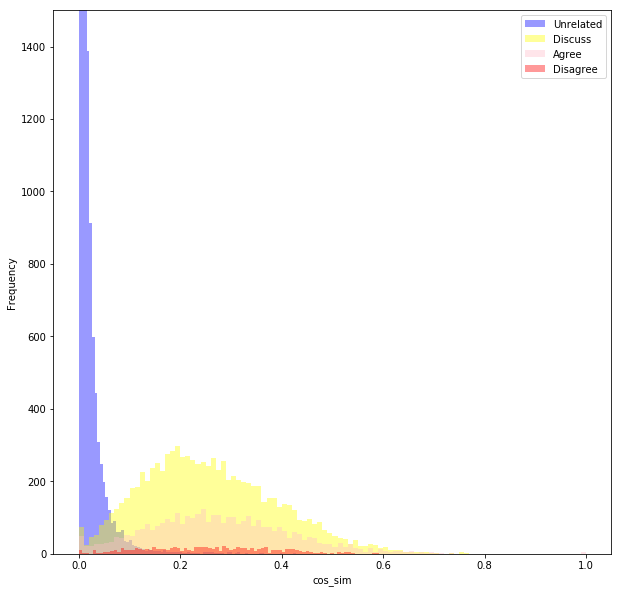

In [293]:
feature_name = 'cos_sim'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

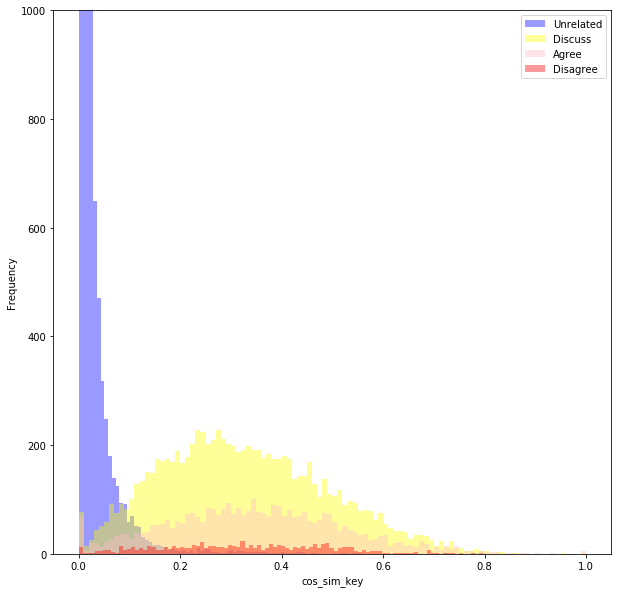

In [298]:
feature_name = 'cos_sim_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1000)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

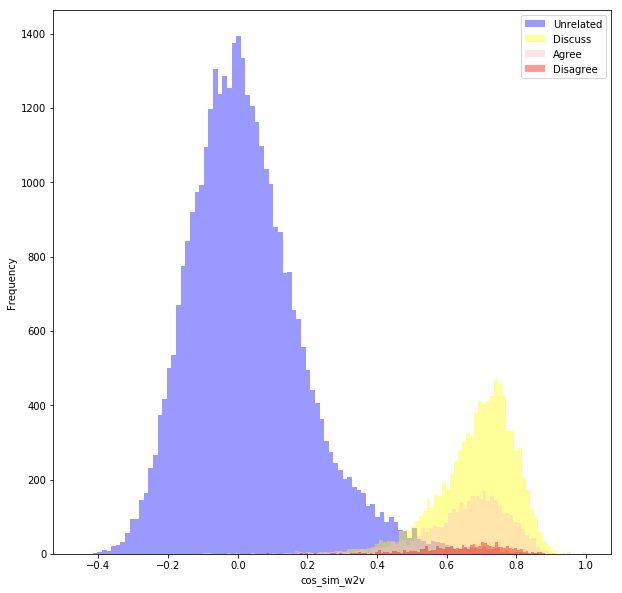

In [296]:
feature_name = 'cos_sim_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

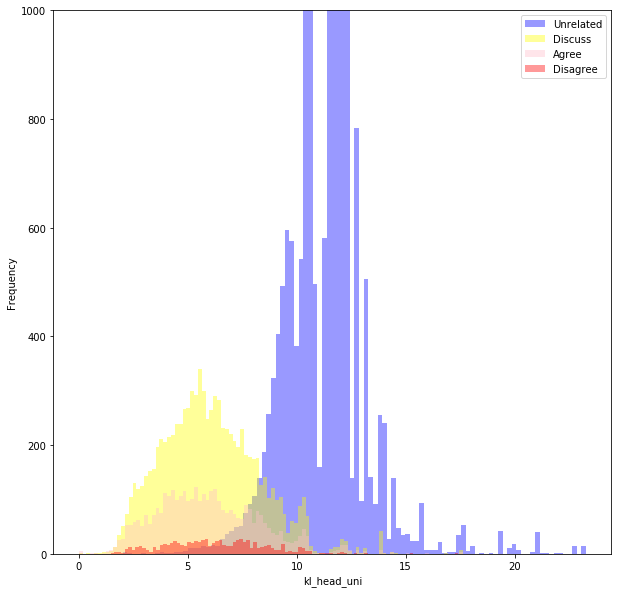

In [297]:
feature_name = 'kl_head_uni'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')
plt.ylim(0,1000)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

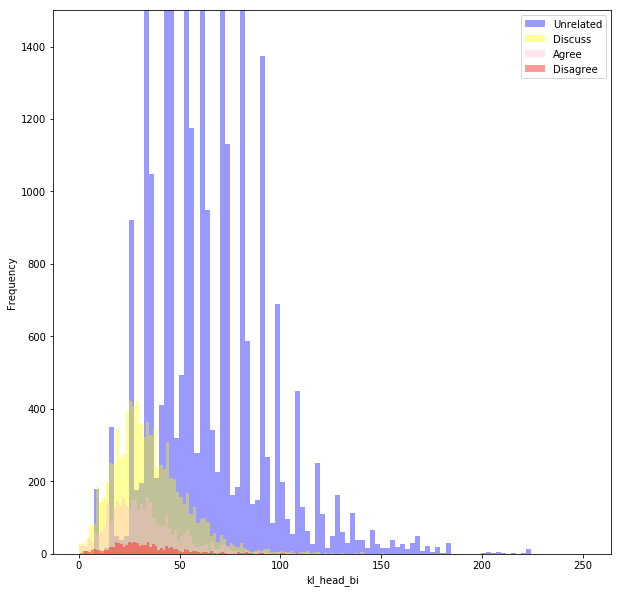

In [123]:
feature_name = 'kl_head_bi'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

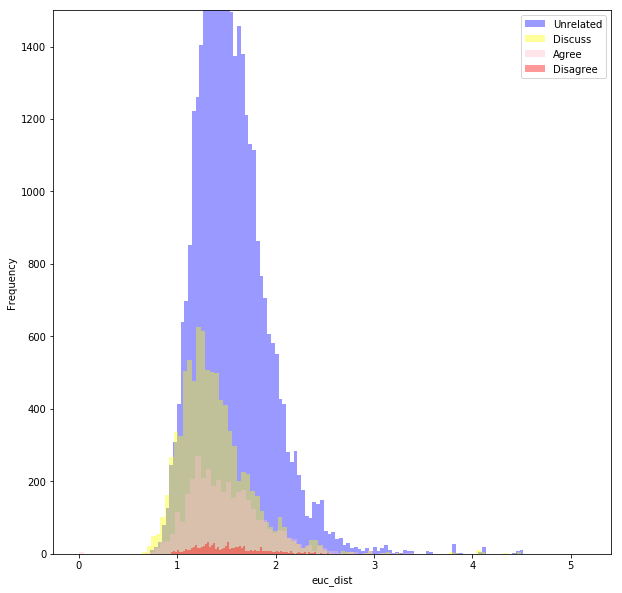

In [127]:
feature_name = 'euc_dist'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

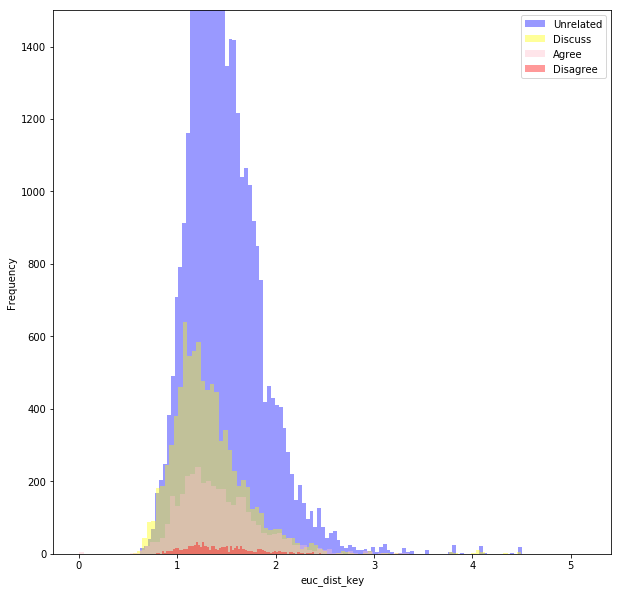

In [128]:
feature_name = 'euc_dist_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

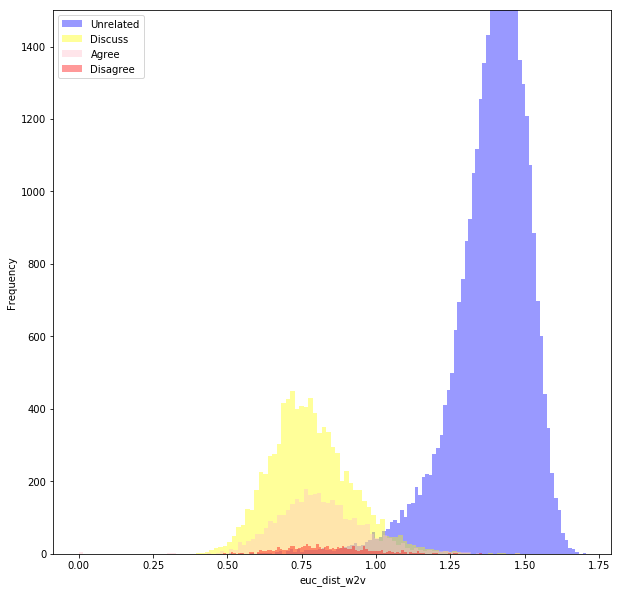

In [129]:
feature_name = 'euc_dist_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

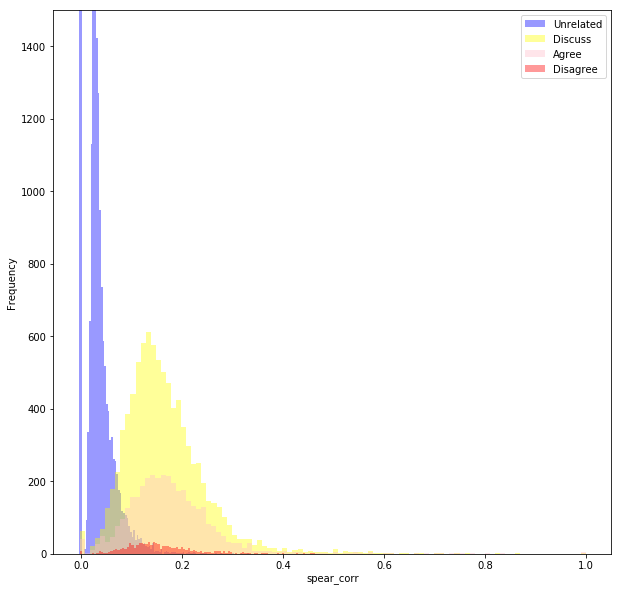

In [130]:
feature_name = 'spear_corr'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

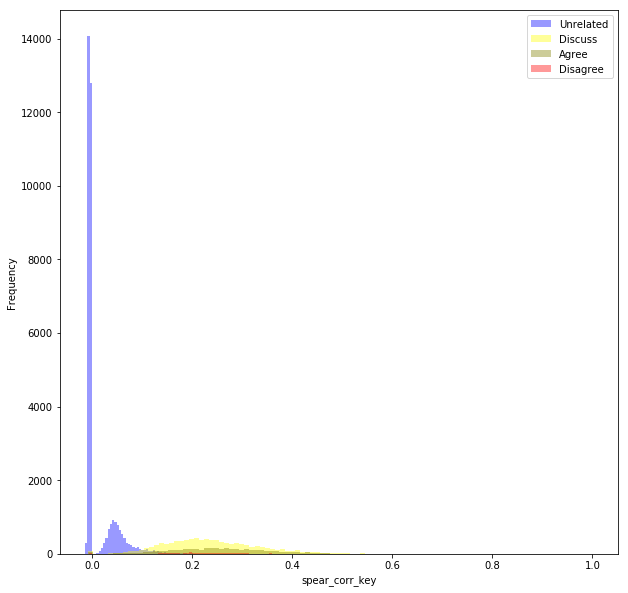

In [131]:
feature_name = 'spear_corr_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

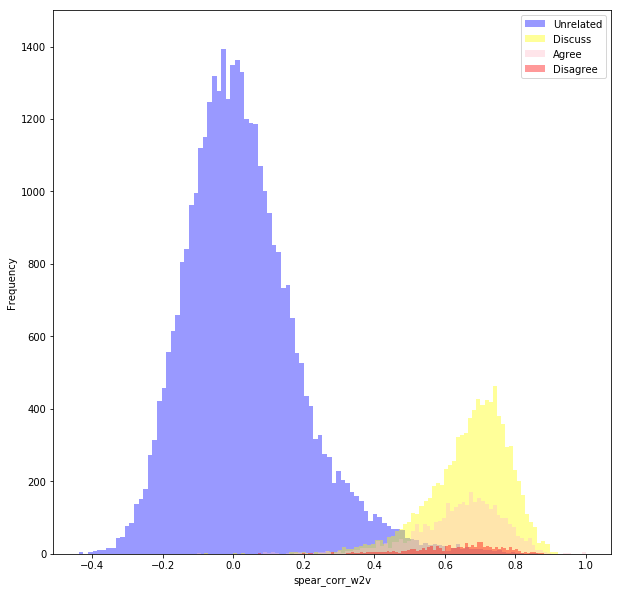

In [132]:
feature_name = 'spear_corr_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

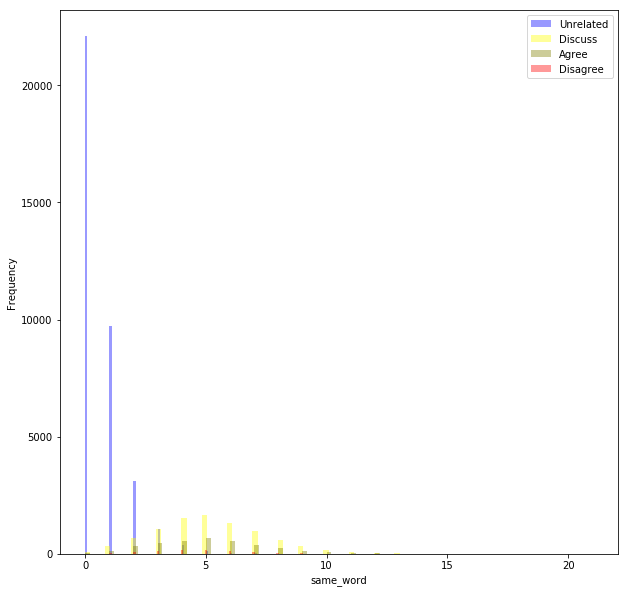

In [133]:
feature_name = 'same_word'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

test set

In [134]:
all_test_merge[0:2]

Headline  Body ID     Stance  \
0  [ferguson, riot, pregnant, woman, lose, eye, c...     2008  unrelated   
1  [crazy, conservatives, sure, gitmo, detainee, ...     1550  unrelated   

                                         articleBody   cos_sim  cos_sim_key  \
0  [respected, senior, french, police, officer, i...  0.008402     0.018119   
1  [dave, morin, social, network, company, path, ...  0.000000     0.000000   

   cos_sim_w2v  kl_head_uni  kl_head_bi  euc_dist  euc_dist_key  euc_dist_w2v  \
0     0.019486    10.613435  102.068682  1.280021      0.887168      1.400367   
1    -0.087034    11.869600   61.788162  1.617679      1.380690      1.474472   

   spear_corr  spear_corr_key  spear_corr_w2v  same_word  
0    0.023827        0.047571        0.005300        1.0  
1   -0.001332       -0.003562       -0.105342        0.0

In [135]:
all_test_merge_copy = all_test_merge.copy()

In [136]:
all_test_merge.shape

(25413, 16)

In [137]:
(all_test_merge.dropna()).shape

(24535, 16)

In [138]:
#There are some out of vocabulary words are reset to 0
all_test_merge = all_test_merge.fillna(value=0)

In [139]:
all_test_merge.shape

(25413, 16)

In [140]:
(all_test_merge.dropna()).shape

(25413, 16)

In [141]:
# all_test_merge.to_csv('all_test_merge.csv')

In [142]:
# all_test_merge = pd.read_csv('all_test_merge.csv')

In [143]:
all_test_merge_unrelated = all_test_merge[all_test_merge['Stance'] == 'unrelated']
all_test_merge_agree = all_test_merge[all_test_merge['Stance'] == 'agree']
all_test_merge_disagree = all_test_merge[all_test_merge['Stance'] == 'disagree']
all_test_merge_discuss = all_test_merge[all_test_merge['Stance'] == 'discuss']

In [144]:
all_test_merge.describe()

Body ID       cos_sim   cos_sim_key   cos_sim_w2v   kl_head_uni  \
count  25413.000000  25413.000000  25413.000000  25413.000000  25413.000000   
mean    1407.471373      0.086492      0.085931      0.151785     10.011110   
std      734.781119      0.153986      0.163356      0.248411      2.906798   
min        1.000000      0.000000      0.000000     -0.380626      0.000000   
25%      823.000000      0.000000      0.000000     -0.029644      8.548193   
50%     1449.000000      0.003650      0.000000      0.095094     11.247777   
75%     2049.000000      0.101192      0.088542      0.300749     12.023751   
max     2586.000000      1.000000      1.000000      1.000000     22.608669   

         kl_head_bi      euc_dist  euc_dist_key  euc_dist_w2v    spear_corr  \
count  25413.000000  25413.000000  25413.000000  25413.000000  25413.000000   
mean      53.843079      1.518958      0.993637      1.282096      0.060320   
std       26.459637      0.400606      0.346303      0.220920      0.090064   
min       -0.069253      0.000000      0.000000      0.000000     -0.004196   
25%       34.524956      1.248952      0.781783      1.180696     -0.001214   
50%       52.517115      1.476111      0.977870      1.344354      0.024834   
75%       69.128214      1.721468      1.201824      1.435022      0.095383   
max      222.198159      4.211132      2.570658      1.661701      1.000000   

       spear_corr_key  spear_corr_w2v     same_word  
count    25413.000000    25413.000000  25413.000000  
mean         0.065818        0.144868      1.778224  
std          0.112752        0.243014      2.467019  
min         -0.014760       -0.388804      0.000000  
25%         -0.003514       -0.031508      0.000000  
50%         -0.001703        0.090562      1.000000  
75%          0.110002        0.289069      3.000000  
max          1.000000        1.000000     18.000000

In [145]:
all_test_merge_unrelated.describe()

Body ID       cos_sim   cos_sim_key   cos_sim_w2v   kl_head_uni  \
count  18349.000000  18349.000000  18349.000000  18349.000000  18349.000000   
mean    1302.505804      0.008374      0.012448      0.042794     11.492997   
std      738.253438      0.023172      0.040966      0.162750      1.250382   
min        1.000000      0.000000      0.000000     -0.380626      2.060428   
25%      710.000000      0.000000      0.000000     -0.067178     10.633783   
50%     1326.000000      0.000000      0.000000      0.025980     11.736069   
75%     1928.000000      0.006845      0.000000      0.131219     12.023751   
max     2527.000000      0.562486      0.797962      0.854976     22.608669   

         kl_head_bi      euc_dist  euc_dist_key  euc_dist_w2v    spear_corr  \
count  18349.000000  18349.000000  18349.000000  18349.000000  18349.000000   
mean      61.125415      1.563762      1.023521      1.375923      0.016741   
std       25.164607      0.405633      0.347066      0.135296      0.029752   
min        0.000000      0.271651      0.139767      0.000000     -0.004196   
25%       43.299354      1.289387      0.814449      1.317586     -0.001388   
50%       61.788162      1.516474      1.013102      1.395394     -0.000852   
75%       71.094222      1.767939      1.231160      1.460943      0.031916   
max      222.198159      4.211132      2.570658      1.661701      0.380965   

       spear_corr_key  spear_corr_w2v     same_word  
count    18349.000000    18349.000000  18349.000000  
mean         0.015198        0.038567      0.536705  
std          0.044382        0.158998      0.885182  
min         -0.014760       -0.388804      0.000000  
25%         -0.003988       -0.069009      0.000000  
50%         -0.002758        0.022675      0.000000  
75%         -0.000948        0.125373      1.000000  
max          0.707213        0.849380     10.000000

In [146]:
all_test_merge_agree.describe()

Body ID      cos_sim  cos_sim_key  cos_sim_w2v  kl_head_uni  \
count  1903.000000  1903.000000  1903.000000  1903.000000  1903.000000   
mean   1684.186022     0.313454     0.302954     0.414171     5.962540   
std     668.944643     0.164722     0.213214     0.177991     2.508317   
min       1.000000     0.000000     0.000000    -0.091695     0.000000   
25%    1232.000000     0.194767     0.132009     0.285612     4.245302   
50%    1767.000000     0.308095     0.281913     0.416982     5.658005   
75%    2289.000000     0.428032     0.445727     0.529024     7.211417   
max    2586.000000     1.000000     1.000000     1.000000    17.643019   

        kl_head_bi     euc_dist  euc_dist_key  euc_dist_w2v   spear_corr  \
count  1903.000000  1903.000000   1903.000000   1903.000000  1903.000000   
mean     32.926027     1.443511      0.923500      1.065971     0.180036   
std      17.636426     0.351942      0.337130      0.179519     0.092189   
min       0.000000     0.000000      0.000000      0.000000    -0.001733   
25%      20.656423     1.201175      0.695649      0.970124     0.126277   
50%      30.952503     1.416789      0.903497      1.079082     0.170915   
75%      41.807287     1.639234      1.132098      1.194894     0.221537   
max     134.909104     3.787335      2.527678      1.477630     1.000000   

       spear_corr_key  spear_corr_w2v    same_word  
count     1903.000000     1903.000000  1903.000000  
mean         0.203715        0.399485     5.207042  
std          0.123275        0.176537     2.477706  
min         -0.006320       -0.129384     0.000000  
25%          0.124563        0.274018     4.000000  
50%          0.197820        0.397472     5.000000  
75%          0.272921        0.512450     7.000000  
max          1.000000        1.000000    18.000000

In [147]:
all_test_merge_disagree.describe()

Body ID     cos_sim  cos_sim_key  cos_sim_w2v  kl_head_uni  \
count   697.000000  697.000000   697.000000   697.000000   697.000000   
mean   1828.215208    0.255816     0.197299     0.292052     7.031484   
std     644.377609    0.177417     0.191374     0.148829     2.547027   
min     157.000000    0.000000     0.000000    -0.128326     1.588125   
25%    1345.000000    0.107718     0.041765     0.192033     5.123749   
50%    1945.000000    0.229517     0.142684     0.292235     6.853017   
75%    2392.000000    0.371420     0.297018     0.388243     8.676032   
max    2586.000000    0.862049     1.000000     0.906331    17.643019   

       kl_head_bi    euc_dist  euc_dist_key  euc_dist_w2v  spear_corr  \
count  697.000000  697.000000    697.000000    697.000000  697.000000   
mean    36.333264    1.517110      0.932404      1.178574    0.144806   
std     20.114618    0.371663      0.336238      0.145436    0.097713   
min     -0.066061    0.252743      0.117140      0.000000   -0.001500   
25%     23.096228    1.281076      0.759352      1.104261    0.081659   
50%     34.816780    1.472566      0.900840      1.189330    0.124303   
75%     45.602466    1.688382      1.152151      1.269842    0.176536   
max    150.267953    3.779440      2.343364      1.502216    0.632207   

       spear_corr_key  spear_corr_w2v   same_word  
count      697.000000      697.000000  697.000000  
mean         0.146739        0.279743    4.054519  
std          0.122718        0.144291    2.044733  
min         -0.005159       -0.105403    0.000000  
25%          0.079556        0.188406    2.000000  
50%          0.134276        0.282658    4.000000  
75%          0.189635        0.373758    5.000000  
max          1.000000        0.879965   12.000000

In [148]:
all_test_merge_discuss.describe()

Body ID      cos_sim  cos_sim_key  cos_sim_w2v  kl_head_uni  \
count  4464.000000  4464.000000  4464.000000  4464.000000  4464.000000   
mean   1655.268593     0.284404     0.278071     0.466030     6.111040   
std     641.136547     0.160074     0.197007     0.213238     2.317780   
min       3.000000     0.000000     0.000000    -0.137996     0.000000   
25%    1199.750000     0.164590     0.114956     0.307652     4.439471   
50%    1763.000000     0.275544     0.261318     0.452491     5.849794   
75%    2194.000000     0.385038     0.424738     0.650801     7.488404   
max    2583.000000     1.000000     1.000000     1.000000    17.643019   

        kl_head_bi     euc_dist  euc_dist_key  euc_dist_w2v   spear_corr  \
count  4464.000000  4464.000000   4464.000000   4464.000000  4464.000000   
mean     35.560352     1.367247      0.910264      1.004721     0.175218   
std      20.013000     0.359614      0.329039      0.225541     0.095909   
min      -0.069253     0.000000      0.000000      0.000000    -0.002292   
25%      22.615320     1.131114      0.706438      0.832641     0.118113   
50%      31.543802     1.318902      0.890652      1.045097     0.160975   
75%      44.119631     1.559478      1.117356      1.175299     0.213577   
max     157.725662     3.930642      2.421600      1.508639     1.000000   

       spear_corr_key  spear_corr_w2v    same_word  
count     4464.000000     4464.000000  4464.000000  
mean         0.202468        0.452210     5.064292  
std          0.130847        0.210657     2.281380  
min         -0.006600       -0.135050     0.000000  
25%          0.120922        0.294858     4.000000  
50%          0.192694        0.432895     5.000000  
75%          0.272963        0.632900     6.000000  
max          1.000000        1.000000    17.000000

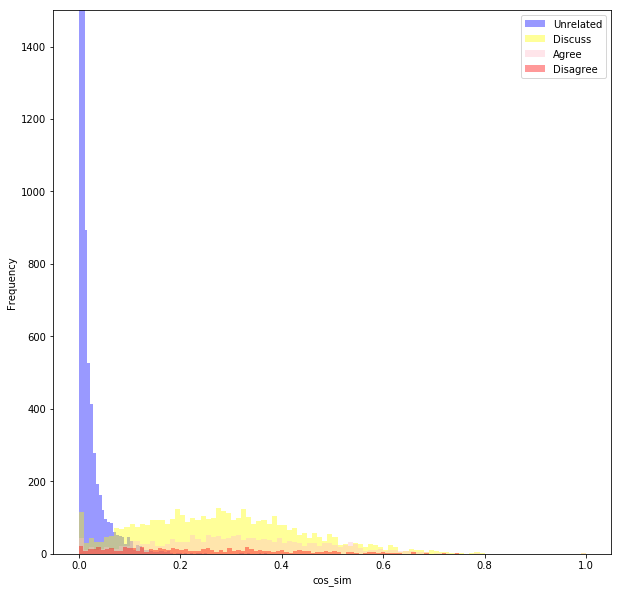

In [149]:
feature_name = 'cos_sim'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(np.nan_to_num(all_test_merge_unrelated[feature_name]), kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

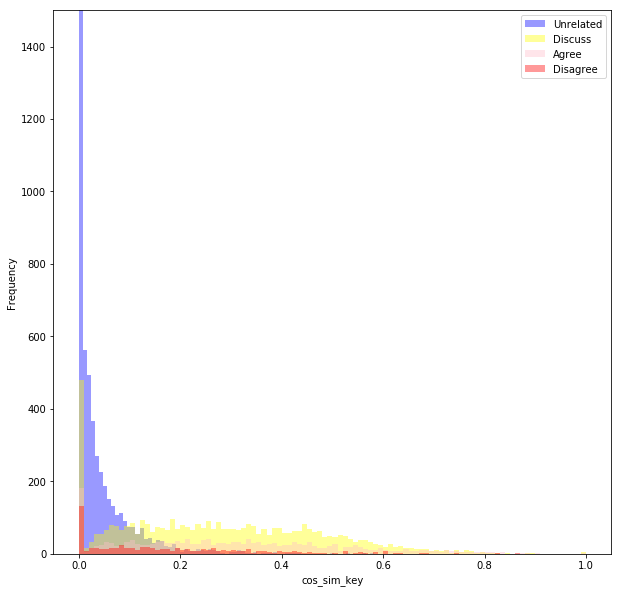

In [150]:
#bad feature
feature_name = 'cos_sim_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

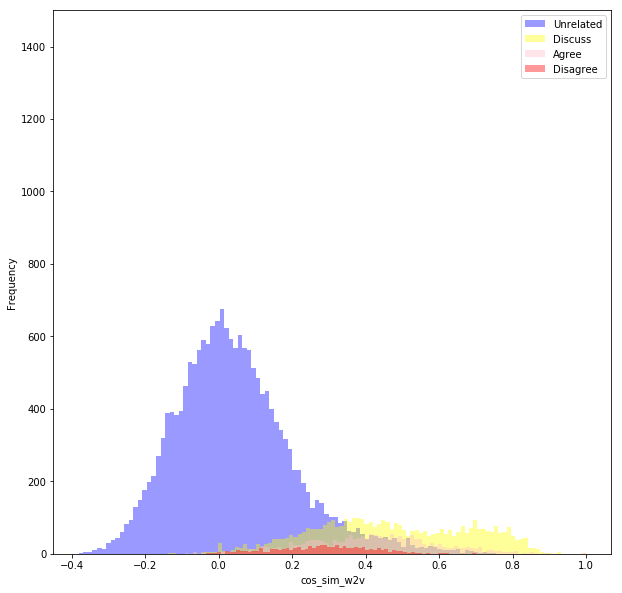

In [151]:
feature_name = 'cos_sim_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

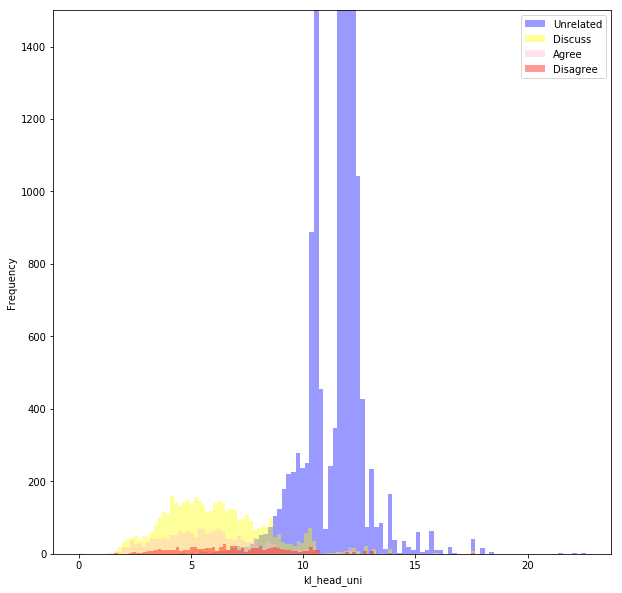

In [153]:
feature_name = 'kl_head_uni'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

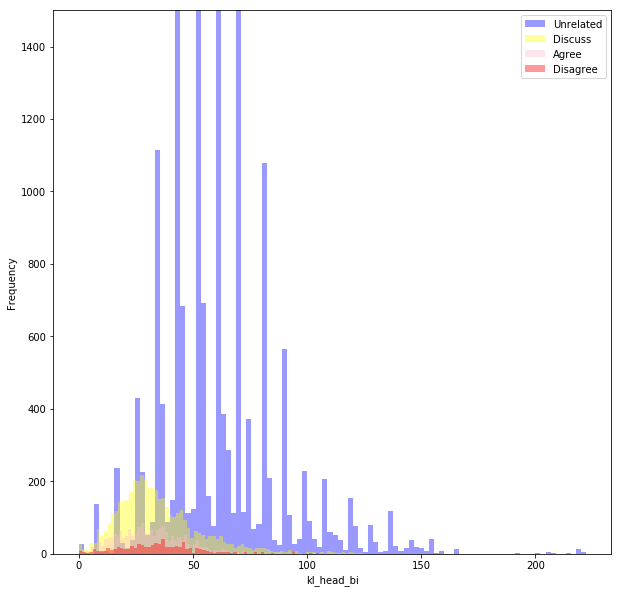

In [154]:
feature_name = 'kl_head_bi'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

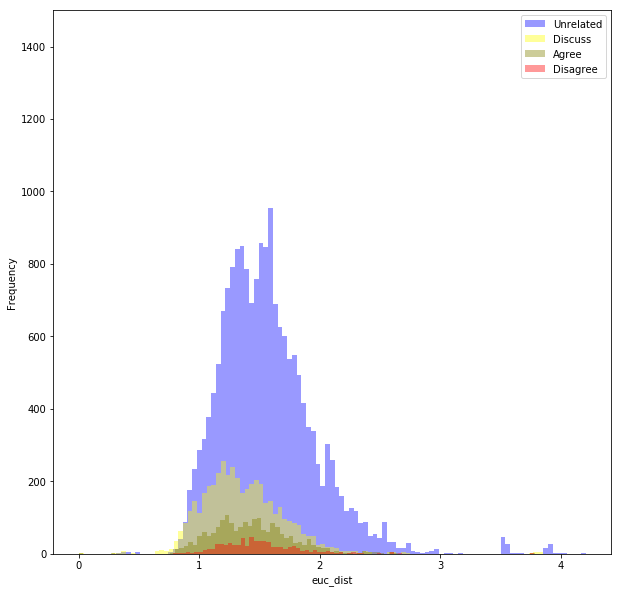

In [155]:
#bad feature
feature_name = 'euc_dist'
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

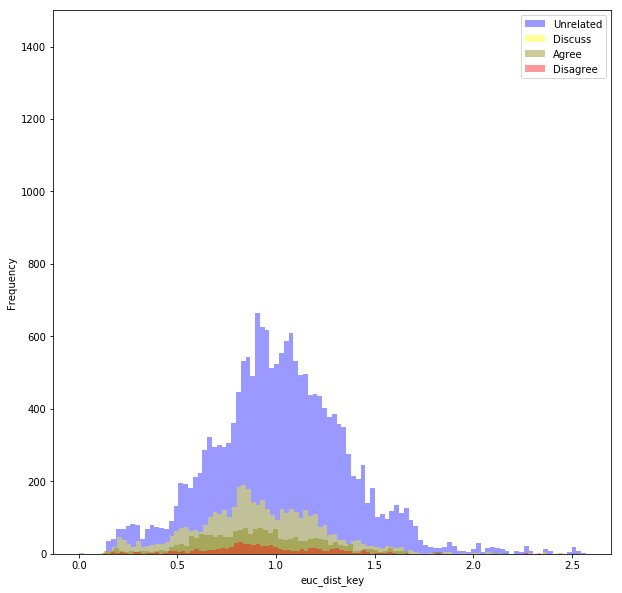

In [156]:
#bad feature
feature_name = 'euc_dist_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

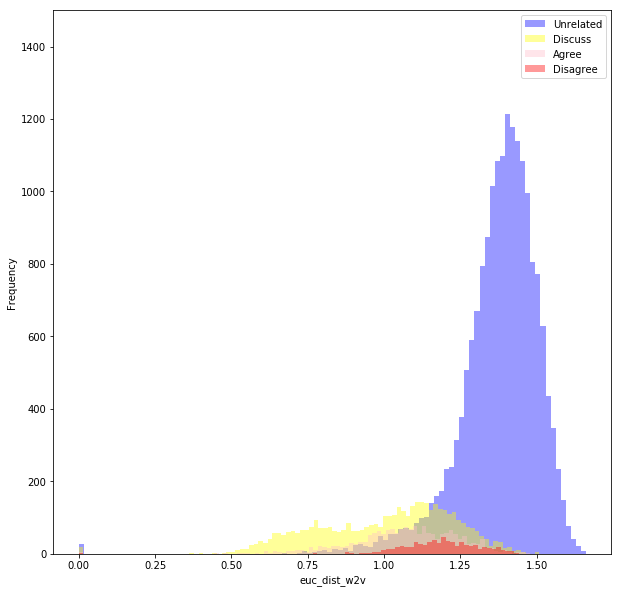

In [157]:
feature_name = 'euc_dist_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

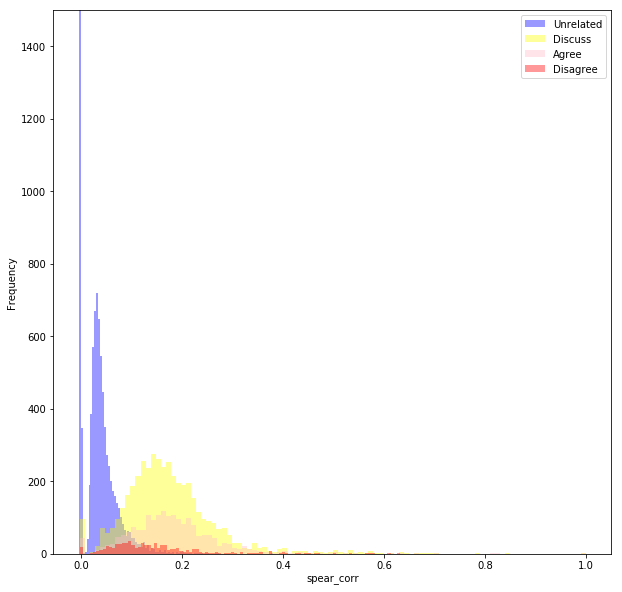

In [158]:
feature_name = 'spear_corr'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

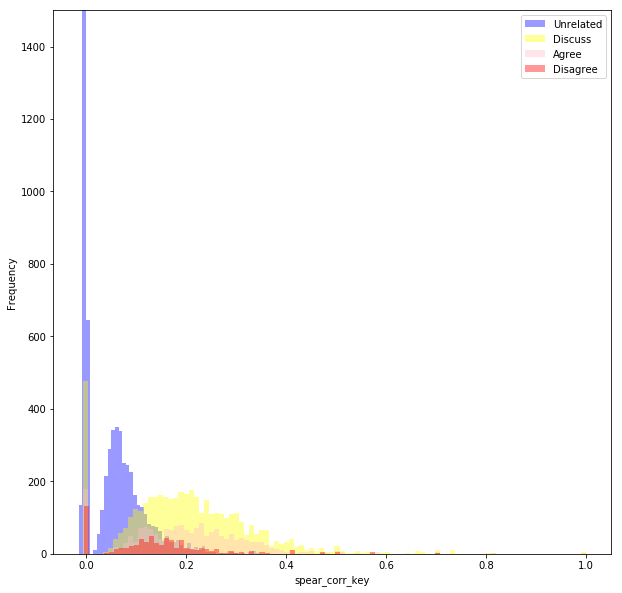

In [159]:
#bad feature
feature_name = 'spear_corr_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

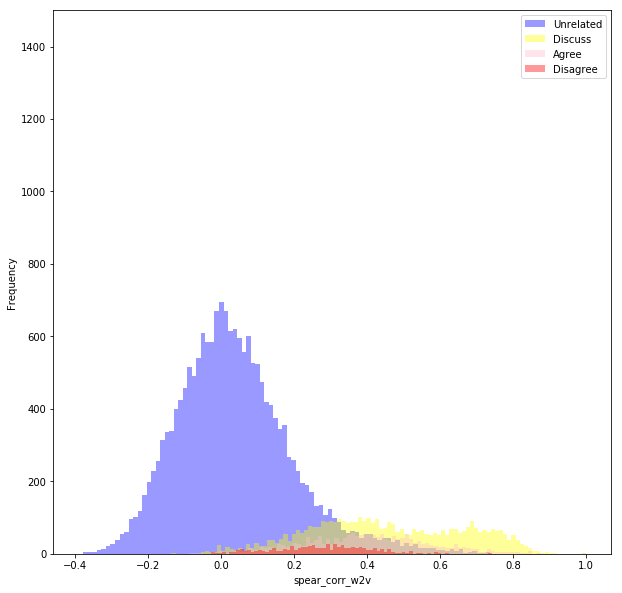

In [160]:
feature_name = 'spear_corr_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

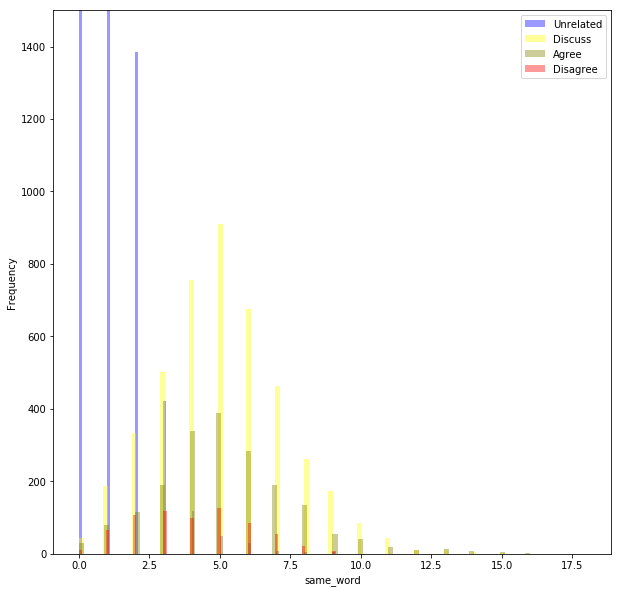

In [161]:
feature_name = 'same_word'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

Insert one vs all label

In [162]:
data = all_merge.copy()

In [163]:
data[0:2]

Headline  Body ID     Stance  \
0  [police, find, mass, graf, least, body, near, ...      712  unrelated   
1  [hundreds, palestinians, flee, flood, gaza, is...      158      agree   

                                         articleBody   cos_sim  cos_sim_key  \
0  [danny, boyle, direct, untitled, film, seth, r...  0.000000     0.000000   
1  [hundreds, palestinians, evacuate, home, sunda...  0.525937     0.658249   

   cos_sim_w2v  kl_head_uni  kl_head_bi  euc_dist  euc_dist_key  euc_dist_w2v  \
0    -0.132897    12.274821  107.867233  1.110189      0.956684      1.505255   
1     0.764779     3.443514   20.116824  1.508805      1.388314      0.685887   

   spear_corr  spear_corr_key  spear_corr_w2v  same_word  
0   -0.001715       -0.005329       -0.148394        0.0  
1    0.193569        0.368627        0.733944        7.0

In [164]:
data['lin_unrelated'] = -1
data['lin_agree'] = -1
data['lin_disagree'] = -1
data['lin_discuss'] = -1

In [165]:
data['lr_unrelated'] = 0
data['lr_agree'] = 0
data['lr_disagree'] = 0
data['lr_discuss'] = 0

In [166]:
data['lin_unrelated'][data['Stance'] == 'unrelated'] = 1
data['lin_agree'][data['Stance'] == 'agree'] = 1
data['lin_disagree'][data['Stance'] == 'disagree'] = 1
data['lin_discuss'][data['Stance'] == 'discuss'] = 1

data['lr_unrelated'][data['Stance'] == 'unrelated'] = 1
data['lr_agree'][data['Stance'] == 'agree'] = 1
data['lr_disagree'][data['Stance'] == 'disagree'] = 1
data['lr_discuss'][data['Stance'] == 'discuss'] = 1

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [167]:
# data.to_csv('data.csv')

In [168]:
# data = pd.read_csv('data.csv')

In [169]:
test_data = all_test_merge.copy()

In [170]:
test_data[0:2]

Headline  Body ID     Stance  \
0  [ferguson, riot, pregnant, woman, lose, eye, c...     2008  unrelated   
1  [crazy, conservatives, sure, gitmo, detainee, ...     1550  unrelated   

                                         articleBody   cos_sim  cos_sim_key  \
0  [respected, senior, french, police, officer, i...  0.008402     0.018119   
1  [dave, morin, social, network, company, path, ...  0.000000     0.000000   

   cos_sim_w2v  kl_head_uni  kl_head_bi  euc_dist  euc_dist_key  euc_dist_w2v  \
0     0.019486    10.613435  102.068682  1.280021      0.887168      1.400367   
1    -0.087034    11.869600   61.788162  1.617679      1.380690      1.474472   

   spear_corr  spear_corr_key  spear_corr_w2v  same_word  
0    0.023827        0.047571        0.005300        1.0  
1   -0.001332       -0.003562       -0.105342        0.0

In [171]:
test_data['lin_unrelated'] = -1
test_data['lin_agree'] = -1
test_data['lin_disagree'] = -1
test_data['lin_discuss'] = -1

In [172]:
test_data['lr_unrelated'] = 0
test_data['lr_agree'] = 0
test_data['lr_disagree'] = 0
test_data['lr_discuss'] = 0

In [173]:
test_data['lin_unrelated'][test_data['Stance'] == 'unrelated'] = 1
test_data['lin_agree'][test_data['Stance'] == 'agree'] = 1
test_data['lin_disagree'][test_data['Stance'] == 'disagree'] = 1
test_data['lin_discuss'][test_data['Stance'] == 'discuss'] = 1

test_data['lr_unrelated'][test_data['Stance'] == 'unrelated'] = 1
test_data['lr_agree'][test_data['Stance'] == 'agree'] = 1
test_data['lr_disagree'][test_data['Stance'] == 'disagree'] = 1
test_data['lr_discuss'][test_data['Stance'] == 'discuss'] = 1

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [174]:
# test_data.to_csv('test_data.csv')

In [175]:
# test_data = pd.read_csv('test_data.csv')

###  subtask 1. training set and validation subset split

In [176]:
#shuffle the data
data = data.sample(frac=1)

In [177]:
data[0:2]

Headline  Body ID     Stance  \
48160  [jihadi, john, name, mohammed, emwazi, west, l...     1660  unrelated   
31884  [vladimir, putin, get, pooped, bird, first, wo...     1155  unrelated   

                                             articleBody   cos_sim  \
48160  [years, ago, job, china, evaluate, spoken, eng...  0.144693   
31884  [man, head, slap, people, carlisle, sneeze, cu...  0.000000   

       cos_sim_key  cos_sim_w2v  kl_head_uni  kl_head_bi  euc_dist  \
48160      0.18644     0.220222    10.093431   44.632611  1.303171   
31884      0.00000    -0.072145    11.736069   71.094222  1.509020   

          ...      spear_corr_w2v  same_word  lin_unrelated  lin_agree  \
48160     ...            0.235311        1.0              1         -1   
31884     ...           -0.099656        0.0              1         -1   

       lin_disagree  lin_discuss  lr_unrelated  lr_agree  lr_disagree  \
48160            -1           -1             1         0            0   
31884            -1           -1             1         0            0   

       lr_discuss  
48160           0  
31884           0  

[2 rows x 24 columns]

In [178]:
data.shape

(49972, 24)

In [179]:
#split the training set and validation set
cut = round(49972*0.9)
train = data[0:cut]
valid = data[cut:49972]

In [180]:
train.shape

(44975, 24)

In [181]:
valid.shape

(4997, 24)

ratios of the four classes

ratios of the four classes in the whole set

In [182]:
train_stances[train_stances['Stance'] == 'agree'].shape[0]/train_stances.shape[0]

0.07360121668134155

In [183]:
train_stances[train_stances['Stance'] == 'disagree'].shape[0]/train_stances.shape[0]

0.016809413271432

In [184]:
train_stances[train_stances['Stance'] == 'discuss'].shape[0]/train_stances.shape[0]

0.1782798367085568

In [185]:
train_stances[train_stances['Stance'] == 'unrelated'].shape[0]/train_stances.shape[0]

0.7313095333386697

ratios of the four classes in the training set

In [186]:
train[train['Stance'] == 'agree'].shape[0]/train.shape[0]

0.07321845469705392

In [187]:
train[train['Stance'] == 'disagree'].shape[0]/train.shape[0]

0.01698721511951084

In [188]:
train[train['Stance'] == 'discuss'].shape[0]/train.shape[0]

0.17881045025013897

In [189]:
train[train['Stance'] == 'unrelated'].shape[0]/train.shape[0]

0.7309838799332963

ratios of the four classes in the validation set

In [190]:
valid[valid['Stance'] == 'agree'].shape[0]/valid.shape[0]

0.07704622773664198

In [191]:
valid[valid['Stance'] == 'disagree'].shape[0]/valid.shape[0]

0.015209125475285171

In [192]:
valid[valid['Stance'] == 'discuss'].shape[0]/valid.shape[0]

0.17350410246147688

In [193]:
valid[valid['Stance'] == 'unrelated'].shape[0]/valid.shape[0]

0.7342405443265959

###  subtask 6-10. model implementation, evaluation and improvement (Linear, LR, XGBoost)

In [194]:
def downsampling(df, model_name, r = 0.1):
    df1 = df[df[model_name]>0]
    df0 = df[df[model_name] <= 0]
    dfs = df0.sample(frac=r)
    sample = pd.concat([df1, dfs],axis=0)
    return sample

In [195]:
def onevsall(y_pred):
    result = []
    _,m = y_pred.shape
    y_pred_class = (y_pred == np.max(y_pred, axis = 0))
    for i in range(m):
        label = ''
        if y_pred_class[0,i]:
            label = 'unrelated'
        elif y_pred_class[1,i]:
            label = 'agree'
        elif y_pred_class[2,i]:
            label = 'disagree'
        elif y_pred_class[3,i]:
            label = 'discuss'
        result.append(label)
        
    assert len(result) == m
    return result

In [196]:
def onevsall_new(y_pred,t=[0,0,0,0]):
    result = []
    _,m = y_pred.shape #(4,m)
    for i in range(m):
        is_unrelated = False
        is_agree = False
        is_disagree = False
        is_discuss = False
        if y_pred[0,i] > t[0]:
            is_unrelated = True
        if y_pred[1,i] > t[1]:
            is_agree = True
        if y_pred[2,i] > t[2]:
            is_disagree = True
        if y_pred[3,i] > t[3]:
            is_discuss = True
        
        if is_disagree:
            label = 'disagree'
        elif is_agree:
            label = 'agree'
        elif is_discuss:
            label = 'discuss'
        elif is_unrelated:
            label = 'unrelated'
        
        result.append(label)
        
    assert len(result) == m
    return result

In [197]:
train[0:2]

Headline  Body ID     Stance  \
48160  [jihadi, john, name, mohammed, emwazi, west, l...     1660  unrelated   
31884  [vladimir, putin, get, pooped, bird, first, wo...     1155  unrelated   

                                             articleBody   cos_sim  \
48160  [years, ago, job, china, evaluate, spoken, eng...  0.144693   
31884  [man, head, slap, people, carlisle, sneeze, cu...  0.000000   

       cos_sim_key  cos_sim_w2v  kl_head_uni  kl_head_bi  euc_dist  \
48160      0.18644     0.220222    10.093431   44.632611  1.303171   
31884      0.00000    -0.072145    11.736069   71.094222  1.509020   

          ...      spear_corr_w2v  same_word  lin_unrelated  lin_agree  \
48160     ...            0.235311        1.0              1         -1   
31884     ...           -0.099656        0.0              1         -1   

       lin_disagree  lin_discuss  lr_unrelated  lr_agree  lr_disagree  \
48160            -1           -1             1         0            0   
31884            -1           -1             1         0            0   

       lr_discuss  
48160           0  
31884           0  

[2 rows x 24 columns]

prepare X

In [198]:
list(train.columns)

['Headline',
 'Body ID',
 'Stance',
 'articleBody',
 'cos_sim',
 'cos_sim_key',
 'cos_sim_w2v',
 'kl_head_uni',
 'kl_head_bi',
 'euc_dist',
 'euc_dist_key',
 'euc_dist_w2v',
 'spear_corr',
 'spear_corr_key',
 'spear_corr_w2v',
 'same_word',
 'lin_unrelated',
 'lin_agree',
 'lin_disagree',
 'lin_discuss',
 'lr_unrelated',
 'lr_agree',
 'lr_disagree',
 'lr_discuss']

In [199]:
col = list(train.columns)[4:16]

In [200]:
col

['cos_sim',
 'cos_sim_key',
 'cos_sim_w2v',
 'kl_head_uni',
 'kl_head_bi',
 'euc_dist',
 'euc_dist_key',
 'euc_dist_w2v',
 'spear_corr',
 'spear_corr_key',
 'spear_corr_w2v',
 'same_word']

In [373]:
# xcols = ['cos_sim_key','cos_sim_w2v','kl_head_uni','euc_dist_w2v','spear_corr_w2v']
xcols = col

In [374]:
train_X = train[xcols].as_matrix()
valid_X = valid[xcols].as_matrix()
test_X = test_data[xcols].as_matrix()

train_X = md.preprocess_X(train_X)
valid_X = md.preprocess_X(valid_X)
test_X = md.preprocess_X(test_X)

In [375]:
m,n = train_X.shape
learning_rate = 0.1
iters = 500
ini_theta = np.zeros([n,1])

linear models

In [376]:
theta_lin = []
cost_lin = []
model_names_lin = ['lin_unrelated','lin_agree','lin_disagree','lin_discuss']
#restore prediction on validation
y_pred_lin = np.zeros([4,len(valid_X)]) 

In [377]:
#build 4 models
#unrelated
i = 0
model_name = model_names_lin[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lin_unrelated


In [378]:
threshold = 0.2
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[1301   27]
 [  87 3582]]
Accuracy: 0.9771863117870723
Recall: 0.9762878168438267
Precision: 0.9925187032418953
F1 score: 0.9843363561417973
AUC: 0.977978245771311


AUC: 0.9952670452866248


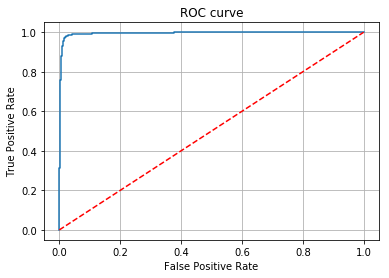

In [379]:
md.roc(valid_y, y_pred_lin[i])

In [380]:
#agree
i = 1
model_name = model_names_lin[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.3)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lin_agree


In [381]:
threshold = 0
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[3945  667]
 [  92  293]]
Accuracy: 0.8481088653191915
Recall: 0.7610389610389611
Precision: 0.30520833333333336
F1 score: 0.4356877323420074
AUC: 0.8082081188542592


AUC: 0.8981995021457294


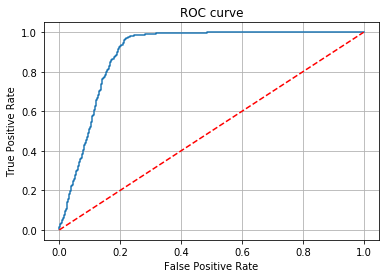

In [382]:
md.roc(valid_y, y_pred_lin[i])

In [383]:
#disagree
i = 2
model_name = model_names_lin[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.05)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))

lin_disagree


In [384]:
threshold = -0.3
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[3618  994]
 [  15  370]]
Accuracy: 0.7980788473083851
Recall: 0.961038961038961
Precision: 0.27126099706744866
F1 score: 0.4230989136649514
AUC: 0.8727571214561675


AUC: 0.8970263907818115


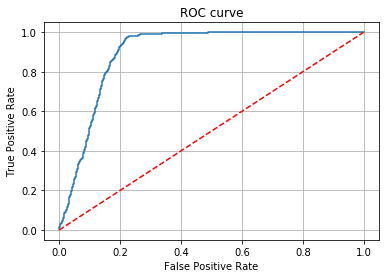

In [385]:
md.roc(valid_y, y_pred_lin[i])

In [386]:
#discuss
i = 3
model_name = model_names_lin[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))

lin_discuss


In [387]:
threshold = -0.1
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[3750  862]
 [  49  336]]
Accuracy: 0.8176906143686212
Recall: 0.8727272727272727
Precision: 0.28046744574290483
F1 score: 0.42451042324699934
AUC: 0.8429117716628557


AUC: 0.8882058098016468


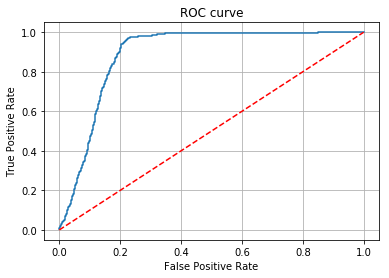

In [388]:
md.roc(valid_y, y_pred_lin[i])

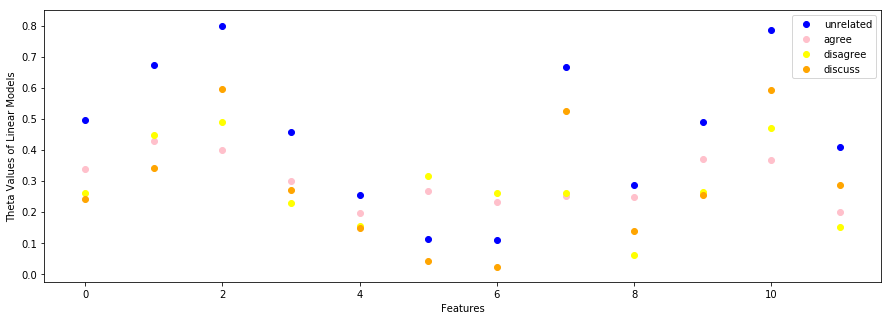

In [389]:
plt.figure(figsize = (15, 5))
plt.scatter(range(len(theta_lin[0])-1),np.abs(theta_lin[0][1:]), color = 'blue', label = 'unrelated')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lin[1][1:]), color = 'pink', label = 'agree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lin[2][1:]), color = 'yellow', label = 'disagree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lin[3][1:]), color = 'orange', label = 'discuss')
plt.xlabel('Features')
plt.ylabel('Theta Values of Linear Models')
plt.legend()
plt.show()

In [390]:
t = [0.2, 0, -0.3, -0.1]

In [391]:
valid_pred_lin = onevsall(y_pred_lin)

In [392]:
sum(valid_pred_lin == valid['Stance'])/ 4997

0.8515109065439264

In [393]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.60      0.01      0.02       385
   disagree       0.07      0.39      0.12        76
    discuss       0.69      0.68      0.68       867
  unrelated       0.98      0.99      0.98      3669

avg / total       0.89      0.85      0.84      4997



In [321]:
valid_pred_lin = onevsall_new(y_pred_lin,t)

In [322]:
sum(valid_pred_lin == valid['Stance'])/ 4997

0.8841304782869722

In [323]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.67      0.01      0.01       385
   disagree       0.00      0.00      0.00        76
    discuss       0.64      0.90      0.75       867
  unrelated       0.97      0.99      0.98      3669

avg / total       0.87      0.88      0.85      4997



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [324]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[   2,    0,  343,   40],
       [   0,    0,   70,    6],
       [   1,    0,  784,   82],
       [   0,    0,   37, 3632]])

result on test set

In [394]:
#restore test results
ts_pred_lin = np.zeros([4,len(test_X)]) 

In [395]:
for i in range(4):
    theta = theta_lin[i]
    ts_pred_lin[i] = (test_X@theta).reshape(len(test_X))

In [396]:
test_pred_lin = onevsall(ts_pred_lin)

In [397]:
sum(test_pred_lin == test_data['Stance'])/ len(test_data)

0.7892810766143312

In [398]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.31      0.03      0.06      1903
   disagree       0.09      0.31      0.14       697
    discuss       0.71      0.38      0.50      4464
  unrelated       0.89      0.99      0.93     18349

avg / total       0.79      0.79      0.77     25413



In [330]:
test_pred_lin = onevsall_new(ts_pred_lin,t)

In [331]:
sum(test_pred_lin == test_data['Stance'])/ len(test_data)

0.8236729233069688

In [332]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.45      0.00      0.01      1903
   disagree       0.00      0.00      0.00       697
    discuss       0.62      0.63      0.63      4464
  unrelated       0.87      0.99      0.92     18349

avg / total       0.77      0.82      0.78     25413



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [333]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[    5,     0,  1192,   706],
       [    0,     0,   262,   435],
       [    6,     0,  2833,  1625],
       [    0,     0,   255, 18094]])

In [371]:
col[6]

'euc_dist_key'

LR models

In [399]:
theta_lr = []
cost_lr = []
lam = 0.1
model_names_lr = ['lr_unrelated','lr_agree','lr_disagree','lr_discuss']
#restore prediction on validation
y_pred_lr = np.zeros([4,len(valid_X)]) 

In [400]:
#build 4 models
#unrelated
i = 0
model_name = model_names_lr[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_unrelated


In [401]:
threshold = 0.7
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[1303   25]
 [ 103 3566]]
Accuracy: 0.974384630778467
Recall: 0.9719269555737258
Precision: 0.9930381509328877
F1 score: 0.9823691460055096
AUC: 0.9765508271844533


AUC: 0.9944149040971736


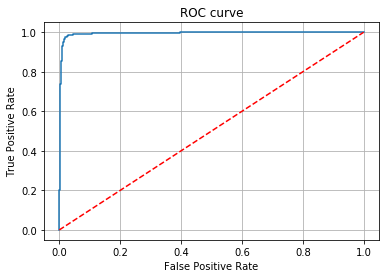

In [402]:
md.roc(valid_y, y_pred_lr[i])

In [403]:
#agree
i = 1
model_name = model_names_lr[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.3)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_agree


In [404]:
threshold = 0.3
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[3684  928]
 [  30  355]]
Accuracy: 0.8082849709825896
Recall: 0.922077922077922
Precision: 0.2766952455183164
F1 score: 0.42565947242206226
AUC: 0.8604318491569142


AUC: 0.8919081785517171


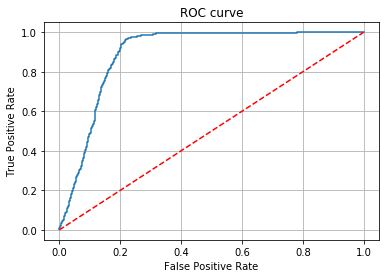

In [405]:
md.roc(valid_y, y_pred_lr[i])

In [407]:
#disagree
i = 2
model_name = model_names_lr[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.1)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_disagree


In [408]:
threshold = 0.2
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[3699 1222]
 [   3   73]]
Accuracy: 0.7548529117470483
Recall: 0.9605263157894737
Precision: 0.05637065637065637
F1 score: 0.10649161196207148
AUC: 0.8561014021540337


AUC: 0.8569770799687697


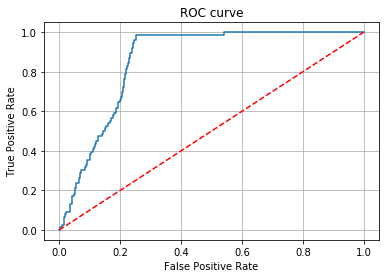

In [409]:
md.roc(valid_y, y_pred_lr[i])

In [410]:
#discuss
i = 3
model_name = model_names_lr[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_discuss


In [411]:
threshold = 0.2
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[3608  522]
 [  16  851]]
Accuracy: 0.8923354012407444
Recall: 0.9815455594002307
Precision: 0.619810633648944
F1 score: 0.7598214285714285
AUC: 0.9275766537921252


AUC: 0.9423653409519341


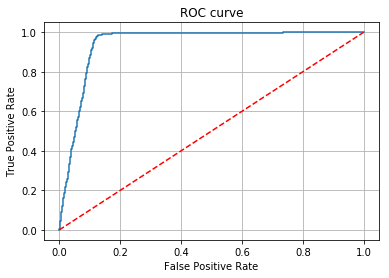

In [412]:
md.roc(valid_y, y_pred_lr[i])

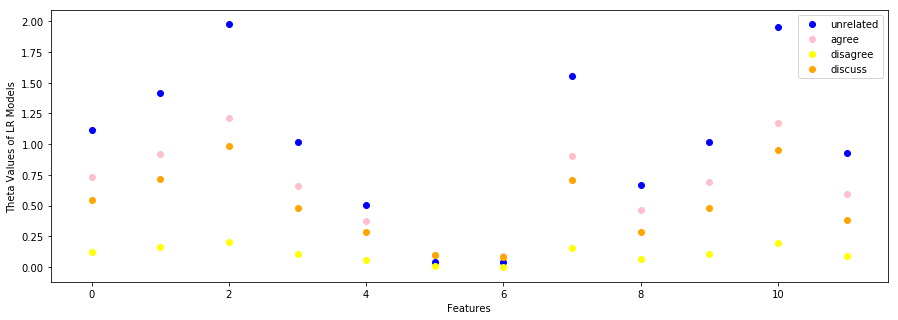

In [413]:
plt.figure(figsize = (15, 5))
plt.scatter(range(len(theta_lin[0])-1),np.abs(theta_lr[0][1:]), color = 'blue', label = 'unrelated')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lr[1][1:]), color = 'pink', label = 'agree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lr[2][1:]), color = 'yellow', label = 'disagree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lr[3][1:]), color = 'orange', label = 'discuss')
plt.xlabel('Features')
plt.ylabel('Theta Values of LR Models')
plt.legend()
plt.show()

In [414]:
t = [0.7,0.3,0.2,0.2]

In [349]:
valid_pred_lr = onevsall(y_pred_lr)

In [350]:
sum(valid_pred_lr == valid['Stance'])/ 4997

0.8817290374224535

In [351]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.00      0.00      0.00       385
   disagree       0.00      0.00      0.00        76
    discuss       0.65      0.88      0.74       867
  unrelated       0.95      0.99      0.97      3669

avg / total       0.81      0.88      0.84      4997



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [352]:
valid_pred_lr = onevsall_new(y_pred_lr,t)

In [353]:
sum(valid_pred_lr == valid['Stance'])/ 4997

0.8789273564138483

In [354]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.27      0.08      0.12       385
   disagree       0.00      0.00      0.00        76
    discuss       0.61      0.89      0.73       867
  unrelated       0.99      0.98      0.98      3669

avg / total       0.85      0.88      0.86      4997



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [355]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[  31,    0,  338,   16],
       [   7,    0,   68,    1],
       [  76,    0,  775,   16],
       [   1,    0,   82, 3586]])

result on test set

In [415]:
#restore test results
ts_pred_lr = np.zeros([4,len(test_X)]) 

In [416]:
for i in range(4):
    theta = theta_lr[i]
    ts_pred_lr[i] = (md.sigmoid(test_X@theta)).reshape(len(test_X))

In [417]:
test_pred_lr = onevsall(ts_pred_lr)

In [418]:
sum(test_pred_lr == test_data['Stance'])/ len(test_data)

0.7593357730295518

In [419]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.27      0.57      0.36      1903
   disagree       0.00      0.00      0.00       697
    discuss       0.00      0.00      0.00      4464
  unrelated       0.85      0.99      0.92     18349

avg / total       0.64      0.76      0.69     25413



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [420]:
test_pred_lr = onevsall_new(ts_pred_lr,t)

In [421]:
sum(test_pred_lr == test_data['Stance'])/ len(test_data)

0.7638216660764175

In [422]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.26      0.77      0.39      1903
   disagree       0.00      0.00      0.00       697
    discuss       0.32      0.01      0.01      4464
  unrelated       0.91      0.98      0.94     18349

avg / total       0.73      0.76      0.71     25413



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [364]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[   33,     0,  1598,   272],
       [    5,     0,   470,   222],
       [  119,     0,  3720,   625],
       [    4,     0,   720, 17625]])

Xgboost model

In [266]:
import xgboost as xgb  

In [267]:
sample0 = (train[train['Stance'] == 'unrelated'].copy()).sample(frac = 0.2)
sample1 = train[train['Stance'] != 'unrelated'].copy()

In [268]:
sample = pd.concat([sample0, sample1],axis=0)

In [269]:
sample.shape

(18674, 24)

In [270]:
col = list(sample.columns)[4:16]

In [271]:
col

['cos_sim',
 'cos_sim_key',
 'cos_sim_w2v',
 'kl_head_uni',
 'kl_head_bi',
 'euc_dist',
 'euc_dist_key',
 'euc_dist_w2v',
 'spear_corr',
 'spear_corr_key',
 'spear_corr_w2v',
 'same_word']

In [272]:
tr_X = sample[col].values.copy()
vl_X = valid[col].values.copy()
ts_X = test_data[col].values.copy()

In [273]:
tr_Y = sample['Stance'].values.copy()
vl_Y = valid['Stance'].values.copy()
ts_Y = test_data['Stance'].values.copy()

In [274]:
for i in range(len(tr_Y)):
    if tr_Y[i] == 'unrelated':
        tr_Y[i] = 0
    elif tr_Y[i] == 'agree':
        tr_Y[i] = 1
    elif tr_Y[i] == 'disagree':
        tr_Y[i] = 2
    elif tr_Y[i] == 'discuss':
        tr_Y[i] = 3

In [275]:
for i in range(len(vl_Y)):
    if vl_Y[i] == 'unrelated':
        vl_Y[i] = 0
    elif vl_Y[i] == 'agree':
        vl_Y[i] = 1
    elif vl_Y[i] == 'disagree':
        vl_Y[i] = 2
    elif vl_Y[i] == 'discuss':
        vl_Y[i] = 3

In [276]:
params={
'booster':'gbtree',
'objective': 'multi:softmax', 
'num_class':4, 
'gamma':0.05, 
'max_depth':15, 
# 'lambda':50, 
'subsample':0.3, 
'colsample_bytree':0.7, 
'silent':1 ,
'eta': 0.2, 
'seed':710,
'nthread':4,
}

plst = list(params.items())

num_rounds = 100 
xg_train = xgb.DMatrix(tr_X, label=tr_Y)
xg_val = xgb.DMatrix(vl_X, label=vl_Y)
xg_test = xgb.DMatrix(ts_X)
watchlist = [(xg_train, 'train'),(xg_val, 'val')]

# training...
model = xgb.train(plst, xg_train, num_rounds, watchlist,early_stopping_rounds=100)
preds = model.predict(xg_test,ntree_limit=model.best_iteration)

[0]	train-merror:0.209007	val-merror:0.125876
Multiple eval metrics have been passed: 'val-merror' will be used for early stopping.

Will train until val-merror hasn't improved in 100 rounds.
[1]	train-merror:0.181804	val-merror:0.109466
[2]	train-merror:0.167506	val-merror:0.109065
[3]	train-merror:0.162311	val-merror:0.108665
[4]	train-merror:0.153957	val-merror:0.107264
[5]	train-merror:0.148656	val-merror:0.107464
[6]	train-merror:0.145229	val-merror:0.106064
[7]	train-merror:0.141909	val-merror:0.107665
[8]	train-merror:0.13891	val-merror:0.103462
[9]	train-merror:0.134144	val-merror:0.105063
[10]	train-merror:0.130288	val-merror:0.105463
[11]	train-merror:0.127718	val-merror:0.104062
[12]	train-merror:0.122952	val-merror:0.102461
[13]	train-merror:0.11931	val-merror:0.102261
[14]	train-merror:0.115722	val-merror:0.104863
[15]	train-merror:0.112563	val-merror:0.102461
[16]	train-merror:0.109832	val-merror:0.102061
[17]	train-merror:0.107958	val-merror:0.100861
[18]	train-merror:0.

In [277]:
set(preds)

{0.0, 1.0, 2.0, 3.0}

In [278]:
pred_class = []
for i in range(len(preds)):
    if preds[i] == 0:
        pred_class.append('unrelated')
    elif preds[i] == 1:
        pred_class.append('agree')
    elif preds[i] == 2:
        pred_class.append('disagree')
    elif preds[i] == 3:
        pred_class.append('discuss')
assert len(pred_class) == len(preds)

In [279]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = ts_Y
y_pred = pred_class
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.32      0.37      0.34      1903
   disagree       0.09      0.03      0.04       697
    discuss       0.58      0.54      0.56      4464
  unrelated       0.94      0.96      0.95     18349

avg / total       0.81      0.82      0.81     25413



In [280]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[  712,    80,   864,   247],
       [  166,    20,   267,   244],
       [ 1283,   112,  2415,   654],
       [   99,     6,   595, 17649]])

In [281]:
sum(y_pred == y_true)/len(y_true)

0.818321331601936

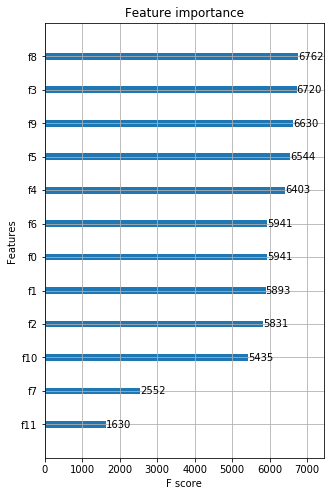

In [372]:
fig, ax = plt.subplots(figsize=(5, 8))
xgb.plot_importance(model, ax=ax, max_num_features=20)
plt.show()

In [289]:
col[8]

'spear_corr'

In [290]:
col[3]

'kl_head_uni'

In [285]:
col[9]

'spear_corr_key'

In [283]:
col[5]

'euc_dist'

In [284]:
col[2]

'cos_sim_w2v'

In [286]:
col[4]

'kl_head_bi'

In [287]:
col[7]

'euc_dist_w2v'

In [288]:
col[11]

'same_word'